In this notebook I will share my Data cleaning + Machine learning Journey on the Telco-Customer Churn Dataset, dataset can be downloaded from https://www.kaggle.com/datasets/blastchar/telco-customer-churn, I will start by cleaning the dataset and then applying various Machine Learning + Deep learning processes to figure out the best techniques to catch churners.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [5]:
df = pd.read_csv("customerchurn.csv")

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.drop("customerID" , axis = 1 , inplace = True)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = "coerce")

In [ ]:
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace = True)

/tmp/ipython-input-3328430945.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace = True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
le = LabelEncoder()

In [ ]:
for col in df.select_dtypes(include = "object").columns:
  df[col] = le.fit_transform(df[col])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


Data has been succesfully cleaned, Now I will apply multiple machine learning models and figure out what works the best (accuracy+recall)

In [ ]:
X = df.drop("Churn", axis = 1)
Y = df["Churn"]

In [ ]:
#Train test split
X_train, X_test , Y_train, Y_test = train_test_split(X, Y, test_size = 0.3 , random_state = 42, stratify = Y)


In [ ]:
lr = LogisticRegression(max_iter = 1000, class_weight = "balanced")

In [ ]:
scaler = StandardScaler()

In [ ]:
results = {}

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
lr.fit(X_train_scaled, Y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
y_pred_lr = lr.predict(X_test_scaled)

In [ ]:
results["LogisticRegression"] = accuracy_score(Y_test, y_pred_lr)

In [ ]:
print(results)

{'LogisticRegression': 0.7392333175579744}


In [ ]:
print(confusion_matrix(Y_test, y_pred_lr))

[[1115  437]
 [ 114  447]]


In [ ]:
print(classification_report(Y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1552
           1       0.51      0.80      0.62       561

    accuracy                           0.74      2113
   macro avg       0.71      0.76      0.71      2113
weighted avg       0.80      0.74      0.75      2113



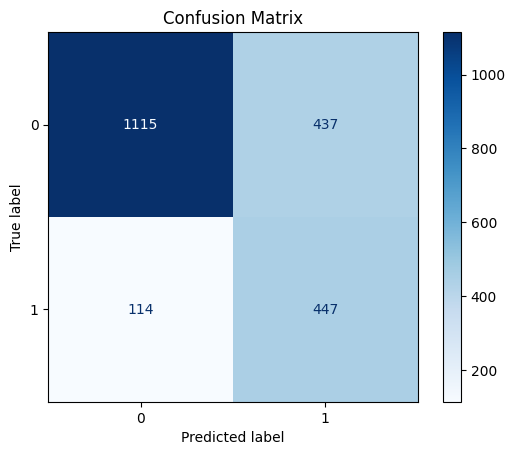

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(lr, X_test_scaled, Y_test, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

Random Forest Classifer

In [ ]:
rf = RandomForestClassifier(n_estimators = 300, max_depth = 12, min_samples_split = 10, min_samples_leaf = 5, class_weight = "balanced" , random_state = 42, n_jobs = -1)

In [ ]:
rf.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', max_depth=12,
                       min_samples_leaf=5, min_samples_split=10,
                       n_estimators=300, n_jobs=-1, random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
results["RandomForest"] = accuracy_score(Y_test , y_pred_rf)

In [ ]:
print(results)

{'LogisticRegression': 0.7392333175579744, 'RandomForest': 0.7671557027922385}


In [ ]:
print(confusion_matrix(Y_test , y_pred_rf))

[[1216  336]
 [ 156  405]]


In [ ]:
print(classification_report(Y_test , y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1552
           1       0.55      0.72      0.62       561

    accuracy                           0.77      2113
   macro avg       0.72      0.75      0.73      2113
weighted avg       0.80      0.77      0.78      2113



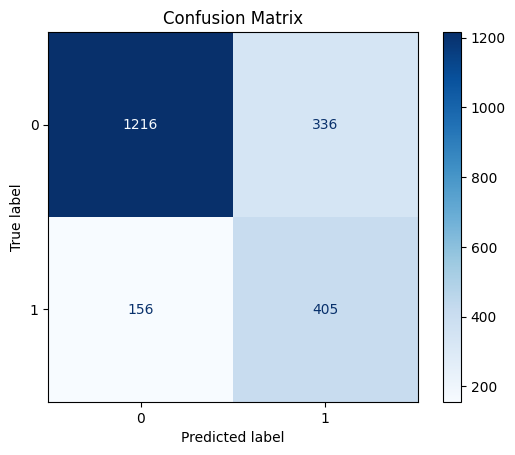

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(rf, X_test, Y_test, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

XGBoost

In [ ]:
xgb = XGBClassifier(n_estimators = 300, learning_rate = 0.05, max_depth = 5, subsample = 0.8 , colsample_bytree= 0.8, eval_metric = "logloss", random_state = 42)

In [ ]:
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_pred_xgb = xgb.predict(X_test)

In [ ]:
results["XGBOOST"] = accuracy_score(Y_test, y_pred_xgb)

In [ ]:
print(results)

{'LogisticRegression': 0.7392333175579744, 'RandomForest': 0.7671557027922385, 'XGBOOST': 0.7879791765262659}


In [ ]:
print(confusion_matrix(Y_test , y_pred_xgb))

[[1391  161]
 [ 287  274]]


In [ ]:
print(classification_report(Y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1552
           1       0.63      0.49      0.55       561

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113



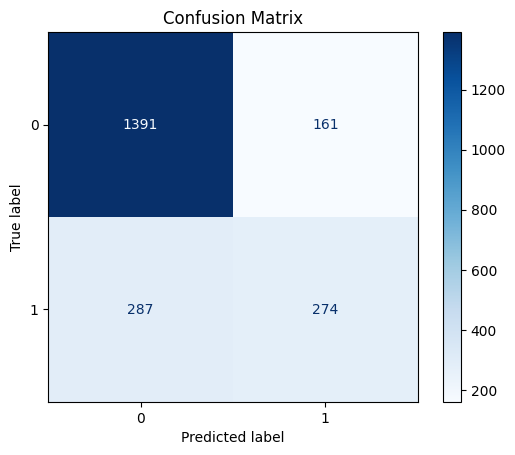

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(xgb, X_test, Y_test, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

Neural Network

In [ ]:
nn = MLPClassifier(hidden_layer_sizes = (64,32), max_iter = 400, random_state = 42)

In [ ]:
nn.fit(X_train_scaled , Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=400, random_state=42)

In [ ]:
y_pred_nn = nn.predict(X_test_scaled)

In [ ]:
results["NeuralNetwork"] = accuracy_score(Y_test, y_pred_nn)

In [ ]:
print(results)

{'LogisticRegression': 0.7392333175579744, 'RandomForest': 0.7671557027922385, 'XGBOOST': 0.7879791765262659, 'NeuralNetwork': 0.7539044013251301}


In [ ]:
print(confusion_matrix(Y_test, y_pred_nn))

[[1308  244]
 [ 276  285]]


In [ ]:
print(classification_report(Y_test, y_pred_nn))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1552
           1       0.54      0.51      0.52       561

    accuracy                           0.75      2113
   macro avg       0.68      0.68      0.68      2113
weighted avg       0.75      0.75      0.75      2113



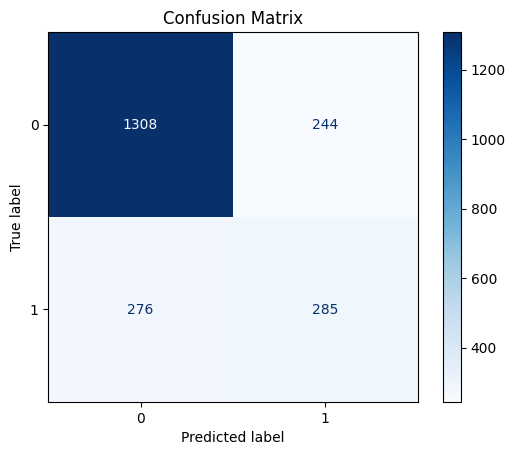

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(nn, X_test_scaled, Y_test, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
dt = DecisionTreeClassifier(criterion = "gini", max_depth = 5, random_state = 42)

In [ ]:
dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
y_pred_dt = dt.predict(X_test)

In [ ]:
results["DecisionTree"] = accuracy_score(Y_test , y_pred_dt)

In [ ]:
print(results)

{'LogisticRegression': 0.7392333175579744, 'RandomForest': 0.7671557027922385, 'XGBOOST': 0.7879791765262659, 'NeuralNetwork': 0.7539044013251301, 'DecisionTree': 0.7865593942262187}


In [ ]:
print(confusion_matrix(Y_test , y_pred_dt))

[[1331  221]
 [ 230  331]]


In [ ]:
print(classification_report(Y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1552
           1       0.60      0.59      0.59       561

    accuracy                           0.79      2113
   macro avg       0.73      0.72      0.72      2113
weighted avg       0.79      0.79      0.79      2113



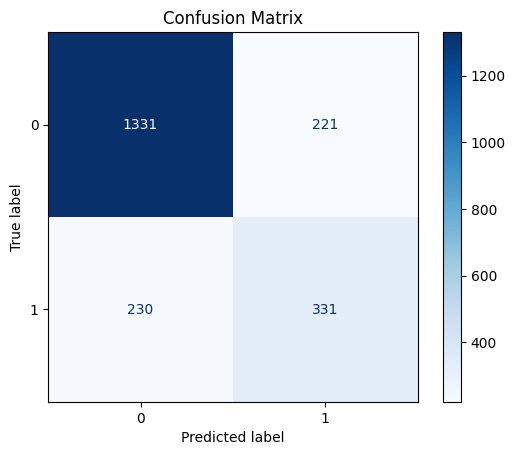

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(dt, X_test, Y_test, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

Taking into account evaluation metrics Vanilla XGBoost performs the best in terms of accuracy (78.9%) while DecisionTree is close behind- But what I have learned while making this notebook is that for churn prediction Recall matters more than accuracy, where LogisticRegression is the winner with 80% recall- While XGBoost only gets around 49% recall. However no papers mention LogisticRegression as a solution (No Idea why) but most of the experts use Ensemble methods like XGBoost, LightGBM etc. Hence for the sake of learning and following experts, I will tune the XGBoost model with techniques like SMOTE, class_pos_weight, and RandomizedSearchCV to find best hyperparameters. I will also be tuning RandomForestClassifier as it is also an ensemble method and I will compare the two.

Trying SMOTE technique to handle class imbalance


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
print("Before SMOTE:" ,Counter(Y_train))

Before SMOTE: Counter({0: 3622, 1: 1308})


In [ ]:
#Applying Smote
smote = SMOTE(random_state = 42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

In [ ]:
print("After SMOTE: " , Counter(Y_train_smote))

After SMOTE:  Counter({0: 3622, 1: 3622})


In [ ]:
#Now applying xgboost to Balanced data
xgb2 = XGBClassifier(n_estimators = 300, learning_rate = 0.05, max_depth = 5, subsample = 0.8 , colsample_bytree = 0.8, eval_metric = "logloss", random_state = 42)

In [ ]:
xgb2.fit(X_train_smote , Y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_pred_xgb2 = xgb2.predict(X_test)

In [ ]:
results["XGboost with smote"] = accuracy_score(Y_test, y_pred_xgb2)

In [ ]:
print(results)

{'LogisticRegression': 0.7392333175579744, 'RandomForest': 0.7671557027922385, 'XGBOOST': 0.7879791765262659, 'NeuralNetwork': 0.7539044013251301, 'DecisionTree': 0.7865593942262187, 'XGboost with smote': 0.7728348319924279}


In [ ]:
print(confusion_matrix(Y_test , y_pred_xgb2))

[[1291  261]
 [ 219  342]]


In [ ]:
print(classification_report(Y_test, y_pred_xgb2))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1552
           1       0.57      0.61      0.59       561

    accuracy                           0.77      2113
   macro avg       0.71      0.72      0.72      2113
weighted avg       0.78      0.77      0.78      2113



I saw that although accuracy score got lower with xgb smote but recall is much better after smote  technique - After smote the model caught 68 more churners than vanilla xgboost

Now let's try a different technique "scale_pos_weight" (pays more attention to the minority class) and see if its better than SMOTE for this dataset.

In [ ]:
churn_ratio = (Y_train == 1).sum() / (Y_train == 0).sum()
print(f"Churn ratio: {churn_ratio}")

Churn ratio: 0.36112644947542794


In [ ]:
xgb3 = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=1/churn_ratio,
    eval_metric='logloss',
    random_state=42
)

In [ ]:
xgb3.fit(X_train , Y_train, eval_set = [(X_test , Y_test)], verbose=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_pred_xgb3 = xgb3.predict(X_test)

In [ ]:
results["XGboost with scale_pos_weight"] = accuracy_score(Y_test, y_pred_xgb3)

In [ ]:
print(results)

{'LogisticRegression': 0.7392333175579744, 'RandomForest': 0.7671557027922385, 'XGBOOST': 0.7879791765262659, 'NeuralNetwork': 0.7539044013251301, 'DecisionTree': 0.7865593942262187, 'XGboost with smote': 0.7728348319924279, 'XGboost with scale_pos_weight': 0.7605300520586843}


In [ ]:
print(confusion_matrix(Y_test,y_pred_xgb3))

[[1186  366]
 [ 140  421]]


In [ ]:
print(classification_report(Y_test, y_pred_xgb3))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1552
           1       0.53      0.75      0.62       561

    accuracy                           0.76      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.76      0.77      2113



Here the same thing happened although overall accuracy score is lower in scale_pos_weight XGboost the classification report justifies the usage of this technique-  Model has significantly better recall with 75%-which means that the model caught 75% of churners- that is significantly higher than Vanilla XGboost and Smote XGboost (147 more churners caught than vanilla XGboost)

Next step is to tune the hyperparameters to achieve even better results I will be going forward with xgb3 (scale_pos_weight) and discarding xgb2 (SmoteXGboost). Hyperparameter tuning will be performed with "RandomizedSearchCV"

In [12]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_dist = {
    "n_estimators" :[200, 300 , 400],
    "learning_rate" : [0.01, 0.05 , 0.1],
    "max_depth" : [3,5,7,9],
    'min_child_weight' : [1,3,5],
    "gamma" : [0,0.1,0.2],
    'subsample' : [0.7,0.8,0.9],
    "colsample_bytree" : [0.7, 0.8 , 0.9]
}

In [ ]:
randomized_search = RandomizedSearchCV(XGBClassifier(eval_metric="logloss", random_state=42),
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    random_state=42,
    n_jobs=-1)
#Here you may notice I have used scoring = "accuracy" but we have been measuring model's performance, through recall, but when I set scoring = "recall" the recall is actually lower than when I use "accuracy" hence I have used accuracy here.

In [ ]:
randomized_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7, 9],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [200, 300, 400],
                                        'subsample': [0.7, 0.8, 0.9]},
                   random_state=42, scoring='accuracy')

In [ ]:
print("Best Parameters: ", randomized_search.best_params_)

Best Parameters:  {'subsample': 0.7, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.7}


In [ ]:
print("Best CV score: " , randomized_search.best_score_)

Best CV score:  0.8040567951318458


RandomizedSearchCV has deduced the best parameters to be used for the XGboost model now I will instantiate a new model and check if these parameters gives better returns than the ones used initially.

In [ ]:
xgb5 = XGBClassifier(subsample= 0.7, n_estimators= 300, min_child_weight= 1, max_depth= 5, learning_rate= 0.01, gamma= 0.1, colsample_bytree= 0.7, scale_pos_weight=1/churn_ratio, eval_metric='logloss', random_state = 42)

In [ ]:
xgb5.fit(X_train , Y_train, eval_set = [(X_test , Y_test)], verbose=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0.1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_pred_xgb5 = xgb5.predict(X_test)

In [ ]:
print(accuracy_score(Y_test, y_pred_xgb5))

0.754850922858495


In [ ]:
print(confusion_matrix (Y_test, y_pred_xgb5))

[[1147  405]
 [ 113  448]]


In [ ]:
print(classification_report(Y_test , y_pred_xgb5))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1552
           1       0.53      0.80      0.63       561

    accuracy                           0.75      2113
   macro avg       0.72      0.77      0.72      2113
weighted avg       0.81      0.75      0.77      2113



The Recall metric shows improvement yet again with 80% of churners caught (after all that tuning and computation we are now on-par with logistic regression model) while increasing precision and slight improvement in f1-score. Trade-off is accuracy with 75% but it doesnt really matter for churn predicition. I have tuned this model as best as I can (to my current knowledge- More improvement will come from Feature engineering.

Before applying Feature engineering, I will be tuning RandomForest and see what results I get.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, recall_score

# Calculate class weight
churn_ratio = (Y_train == 0).sum() / (Y_train == 1).sum()

# Test 1: Random Forest with class_weight only
rf_balanced = RandomForestClassifier(
    class_weight={0: 1, 1: churn_ratio},
    random_state=42,
    n_estimators=300
)
rf_balanced.fit(X_train, Y_train)
y_pred_rf = rf_balanced.predict(X_test)

print("=== Random Forest + class_weight ===")
print(classification_report(Y_test, y_pred_rf))

# Test 2: Tune Random Forest
param_dist_rf = {
    'n_estimators': [200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

rf_search = RandomizedSearchCV(
    RandomForestClassifier(
        class_weight={0: 1, 1: churn_ratio},
        random_state=42
    ),
    param_distributions=param_dist_rf,
    n_iter=50,
    scoring='recall',  # Optimize for recall
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rf_search.fit(X_train, Y_train)
print(f"\nBest RF params: {rf_search.best_params_}")
print(f"Best RF CV recall: {rf_search.best_score_}")

y_pred_rf_tuned = rf_search.best_estimator_.predict(X_test)
print("\n=== Tuned Random Forest ===")
print(classification_report(Y_test, y_pred_rf_tuned))

=== Random Forest + class_weight ===
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1552
           1       0.63      0.47      0.54       561

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.70      2113
weighted avg       0.77      0.79      0.77      2113

Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best RF params: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}
Best RF CV recall: 0.7393319879500453

=== Tuned Random Forest ===
              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1552
           1       0.54      0.74      0.62       561

    accuracy                           0.76      2113
   macro avg       0.71      0.75      0.72      2113
weighted avg       0.80      0.76      0.77      2113



Here I observed that it took so long for the model to fit and train, while the model didnt even get that better compared to vanilla, a 2% jump is not significant enough compared to the compute time (LogisticRegression gave 80% and took less than a min.)

Now I will implement Feature Engineering on our dataset and fit it into both XGboost and RandomForest algorithms.

In [ ]:
for col in df.columns:
    churn_rate_by_feature = df.groupby(col)['Churn'].mean()
    print(f"\n{col}:")
    print(churn_rate_by_feature.sort_values(ascending=False))


gender:
gender
0    0.269209
1    0.261603
Name: Churn, dtype: float64

SeniorCitizen:
SeniorCitizen
1    0.416813
0    0.236062
Name: Churn, dtype: float64

Partner:
Partner
0    0.329580
1    0.196649
Name: Churn, dtype: float64

Dependents:
Dependents
0    0.312791
1    0.154502
Name: Churn, dtype: float64

tenure:
tenure
1     0.619902
2     0.516807
5     0.481203
4     0.471591
3     0.470000
        ...   
63    0.055556
64    0.050000
71    0.035294
72    0.016575
0     0.000000
Name: Churn, Length: 73, dtype: float64

PhoneService:
PhoneService
1    0.267096
0    0.249267
Name: Churn, dtype: float64

MultipleLines:
MultipleLines
2    0.286099
0    0.250442
1    0.249267
Name: Churn, dtype: float64

InternetService:
InternetService
1    0.418928
0    0.189591
2    0.074050
Name: Churn, dtype: float64

OnlineSecurity:
OnlineSecurity
0    0.417667
2    0.146112
1    0.074050
Name: Churn, dtype: float64

OnlineBackup:
OnlineBackup
0    0.399288
2    0.215315
1    0.074050
Name: C

In [6]:
df_original = df.copy()

In [7]:
X_original = df_original.drop("Churn", axis = 1)
Y_original = df_original["Churn"]

In [8]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_original , Y_original , test_size = 0.3, random_state = 42, stratify = Y_original)

In [9]:
#FeatureEngineering
def create_features(df_input):
  df = df_input.copy()

  #Tenure-Based features
  df["is_new_customer"] = (df["tenure"] <= 12).astype(int)
  df["is_vulnerable_period"] = ((df["tenure"] > 12) & (df["tenure"] <= 24)).astype(int)
  df["is_loyal_customer"] = (df["tenure"] >= 60).astype(int)
  df["months_in_the_first_year"] = df["tenure"].clip(upper = 12)

  #Contract_type
  df["is_month_to_month"] = (df["Contract"] == 0).astype(int)
  contract_risk = {0:3 , 1:2, 2:1}
  df["Contract_risk_Score"] = df["Contract"].map(contract_risk)

  #New customer on mtm
  df["new_customer_on_mtm"] = (df["is_new_customer"] * (df["is_month_to_month"]))

  df["Tenure_contract_mismatch"] = (((df["Contract"] ==  1) & (df["tenure"] < 12)) | ((df["Contract"] == 2) & (df["tenure"] < 24))).astype(int)

  #PaymentMethodRisk
  df["is_electronic_check"] = (df["PaymentMethod"] == 2).astype(int)
  payment_risk = {0:1 , 1:1 , 2 : 3, 3: 2}
  df["payment_risk_score"] = df["PaymentMethod"].map(payment_risk).astype(int)
  df["is_auto_payment"] = ((df["PaymentMethod"] == 0) | (df["PaymentMethod"] == 1)).astype(int)
  df["electronic_check_mtm"] = (df["is_electronic_check"] * (df["is_month_to_month"]))

  #ChargesFeature

  df['monthly_to_total_ratio'] = df['MonthlyCharges'] / (df['TotalCharges'] + 1)
  df['avg_monthly_charges'] = df['TotalCharges'] / (df['tenure'] + 1)
  df['charges_vs_average'] = df['MonthlyCharges'] - df['avg_monthly_charges']

  #Service features
  df['total_services'] = 0

  # Based on LabelEncoder output: PhoneService 1=Yes, others (MultipleLines, OnlineSecurity etc.) 2=Yes
  if 'PhoneService' in df.columns: # Check for existence as these cols are dynamic
      df['total_services'] += (df['PhoneService'] == 1).astype(int)

  for col in ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
        if col in df.columns:
            df['total_services'] += (df[col] == 2).astype(int)

  # InternetService itself is not a binary 'Yes/No', but indicates if internet is present
  if 'InternetService' in df.columns:
      df['total_services'] += (df['InternetService'] != 2).astype(int) # 2 means 'No' internet service

  df['services_per_dollar'] = df['total_services'] / (df['MonthlyCharges'] + 1)


  # Internet without security (check column types first)
  if 'InternetService' in df.columns and 'OnlineSecurity' in df.columns:
      df['internet_no_security'] = (
          (df['InternetService'] != 2) & # Not 'No' internet service
          (df['OnlineSecurity'] == 0)    # OnlineSecurity 'No'
      ).astype(int)

  # Low engagement
  if 'InternetService' in df.columns: # This 'if' block was correctly indented
      df['low_service_engagement'] = (
          (df['InternetService'] != 2) & # Not 'No' internet service
          (df['total_services'] <= 2)
      ).astype(int)

  return df


In [ ]:
# Need to retune with new features

from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2]
}

churn_ratio = (Y_train2 == 0).sum() / (Y_train2 == 1).sum()

random_search2 = RandomizedSearchCV(
    XGBClassifier(
        scale_pos_weight=churn_ratio,
        eval_metric="logloss",
        random_state=42
    ),
    param_distributions=param_dist,
    n_iter=50,
    scoring='recall',
    cv=5,
    random_state=42,
    n_jobs=-1
)

random_search2.fit(X_train2, Y_train2)

print(f"Best parameters: {random_search2.best_params_}")
print(f"Best CV recall: {random_search2.best_score_:.3f}")


best_model = random_search2.best_estimator_
y_pred_tuned = best_model.predict(X_test2)

from sklearn.metrics import classification_report
print("\n=== After Retuning ===")
print(classification_report(Y_test2, y_pred_tuned))

Best parameters: {'subsample': 0.7, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.2, 'colsample_bytree': 0.9}
Best CV recall: 0.822

=== After Retuning ===
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1552
           1       0.50      0.82      0.62       561

    accuracy                           0.73      2113
   macro avg       0.70      0.76      0.70      2113
weighted avg       0.80      0.73      0.75      2113



In [ ]:
print(accuracy_score(Y_test2, y_pred_tuned))

0.7302413629910081


At the end- with around 23 new features added and XGBoost model with scale_pos_weight applied and hyperparameter tuning with RandomizedSearchCV my XGboost model beats logistic regression by 2% in recall. It catches more churners but also has lower precision (high false positive rate) and has 73% accuracy. This recall puts this model around 10-15% of top models and it'll be much better with heavier feature engineering (50-60 features) possibly going to (85% recall) which is in the top 5%.

This notebook shares my journey of implementing the knowledge I have learned, By cleaning a real-life dataset and applying + tuning ML models to the best of my knowledge (and learning along) and feature engineering based on the dataset.